# Image Classification using tf.keras

# Importing Packages

Let's start by importing required packages. **os** package is used to read files and directory structure, **numpy** is used to convert python list to numpy array and to perform required matrix operations and **matplotlib.pyplot** is used to plot the graph and display images in our training and validation data.

In [ ]:
import os
import numpy as np
import glob
import shutil
from pathlib import Path

import tensorflow as tf

import matplotlib.pyplot as plt

# Import TensorFlow and Keras Layers

In the cell below, import Tensorflow as `tf` and the Keras layers and models you will use to build your CNN. Also, import the `ImageDataGenerator` from Keras so that you can perform image augmentation.

In [ ]:
#import packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Loading

In order to build our image classifier, we can begin by importing the marvel dataset. We first need to download the dataset and after the download we are storing it.

In [ ]:
data_dir = Path("/content/MarvelDataSet.zip")

! unzip "/content/MarvelDataSet.zip"

Archive:  /content/MarvelDataSet.zip
   creating: MarvelDataSet/
   creating: MarvelDataSet/AntMan/
  inflating: MarvelDataSet/AntMan/am1.jpg  
  inflating: MarvelDataSet/AntMan/am10.jpg  
  inflating: MarvelDataSet/AntMan/am11.jpg  
  inflating: MarvelDataSet/AntMan/am12.jpg  
  inflating: MarvelDataSet/AntMan/am13.jpg  
  inflating: MarvelDataSet/AntMan/am14.jpg  
  inflating: MarvelDataSet/AntMan/am15.jpg  
  inflating: MarvelDataSet/AntMan/am16.jpg  
  inflating: MarvelDataSet/AntMan/am17.jpg  
  inflating: MarvelDataSet/AntMan/am18.jpg  
  inflating: MarvelDataSet/AntMan/am19.jpg  
  inflating: MarvelDataSet/AntMan/am2.jpg  
  inflating: MarvelDataSet/AntMan/am20.jpg  
  inflating: MarvelDataSet/AntMan/am21.jpg  
  inflating: MarvelDataSet/AntMan/am22.jpg  
  inflating: MarvelDataSet/AntMan/am23.jpg  
  inflating: MarvelDataSet/AntMan/am24.jpg  
  inflating: MarvelDataSet/AntMan/am25.jpg  
  inflating: MarvelDataSet/AntMan/am3.jpg  
  inflating: MarvelDataSet/AntMan/am4.jpg  
  in

After downloading the dataset, we need to extract its contents.

In [ ]:
#_URL = "/content/MarvelDataSet.zip"


#zip_file = tf.keras.utils.get_file(origin=_URL,fname="MarvelDataSet.zip", extract=True)

base_dir = os.path.join(os.path.dirname('/content/MarvelDataSet/'))

In [ ]:
classes = ['AntMan', 'BlackPanther', 'BlackWidow', 'CaptainAmerica', 'CaptainMarvel', 'Drax', 'DrStrange', 'Gamora', 'HawkEye', 'Hulk',
           'Ironman', 'Loki', 'Quake', 'ScarlettWitch', 'Spiderman', 'Thor', 'Valkyrie', 'Vision', 'WinterSoldier', 'Yondu']

In [ ]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

AntMan: 48 Images
BlackPanther: 50 Images
BlackWidow: 143 Images
CaptainAmerica: 86 Images
CaptainMarvel: 20 Images
Drax: 25 Images
DrStrange: 88 Images
Gamora: 48 Images
HawkEye: 25 Images
Hulk: 116 Images
Ironman: 115 Images
Loki: 49 Images
Quake: 24 Images
ScarlettWitch: 46 Images
Spiderman: 121 Images
Thor: 100 Images
Valkyrie: 25 Images
Vision: 25 Images
WinterSoldier: 25 Images
Yondu: 25 Images


set up the path for the training and validation sets




In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

# Data Augmentation

Overfitting generally occurs when we have small number of training examples. One way to fix this problem is to augment our dataset so that it has sufficient number of training examples. Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, your model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.

In **tf.keras** we can implement this using the same **ImageDataGenerator** class we used before. We can simply pass different transformations we would want to our dataset as a form of arguments and it will take care of applying it to the dataset during our training process. 

## Experiment with Various Image Transformations

# Set Batch and Image Size

In the cell below, create a `batch_size` of 100 images and set a value to `IMG_SHAPE` such that our training data consists of images with width of 150 pixels and height of 150 pixels.

In [ ]:
BATCH_SIZE = 100 
IMG_SHAPE = 150

# Apply Random Horizontal Flip

In the cell below, use ImageDataGenerator to create a transformation that rescales the images by 255 and then applies a random horizontal flip. Then use the `.flow_from_directory` method to apply the above transformation to the images in our training set.

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))


Found 962 images belonging to 20 classes.


Let's take 1 sample image from our training examples and repeat it 5 times so that the augmentation can be applied to the same image 5 times over randomly, to see the augmentation in action.

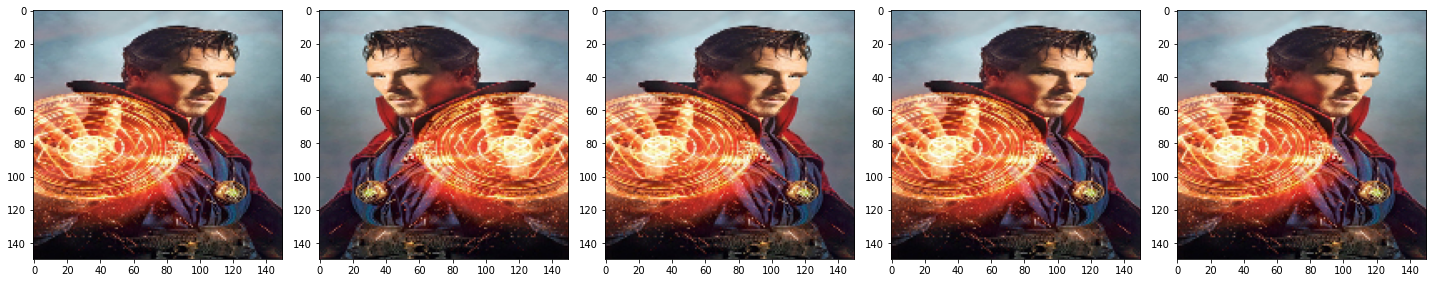

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

# Apply Random Rotation

In the cell below, use ImageDataGenerator to create a transformation that rescales the images by 255 and then applies a random 45 degree rotation. Then use the `.flow_from_directory` method to apply the above transformation to the images in our training set. Make sure you indicate the batch size, the path to the directory of the training images, the target size for the images, and to shuffle the images. 

In [ ]:
image_gen = image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 962 images belonging to 20 classes.


Let's take 1 sample image from our training examples and repeat it 5 times so that the augmentation can be applied to the same image 5 times over randomly, to see the augmentation in action.

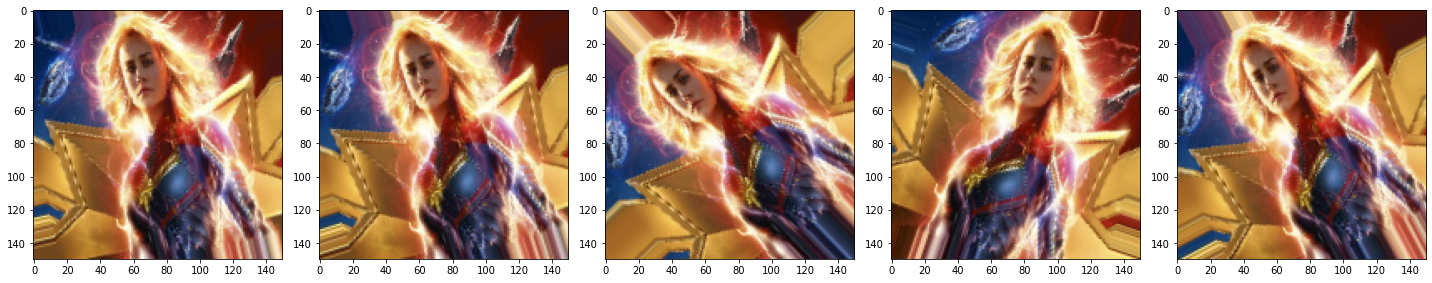

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

# Apply Random Zoom

In the cell below, use ImageDataGenerator to create a transformation that rescales the images by 255 and then applies a random zoom of up to 50%. Then use the `.flow_from_directory` method to apply the above transformation to the images in our training set. 

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 962 images belonging to 20 classes.


Let's take 1 sample image from our training examples and repeat it 5 times so that the augmentation can be applied to the same image 5 times over randomly, to see the augmentation in action.

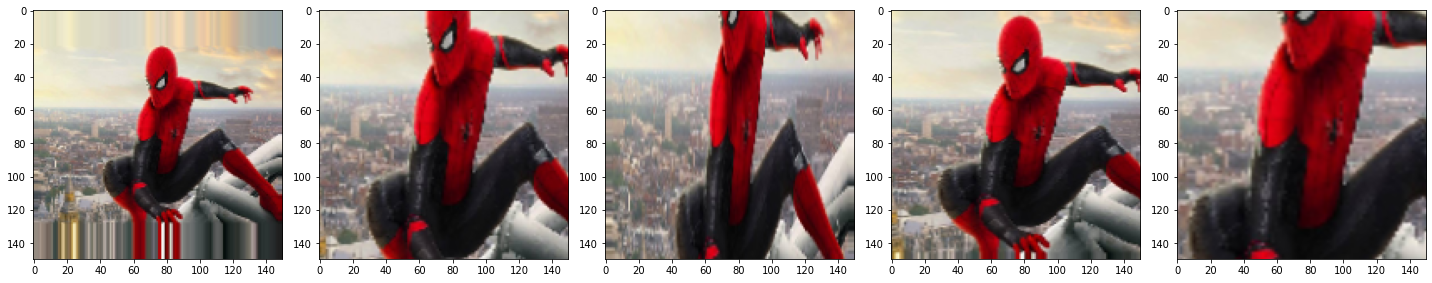

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

# Perform data augmentation

In the cell below, use ImageDataGenerator to create a transformation that rescales the images by 255 and that applies:

- random 45 degree rotation
- random zoom of up to 50%
- random horizontal flip
- width shift of 0.15
- height shift of 0.15

Then use the `.flow_from_directory` method to apply the above transformation to the images in our training set. Make sure you indicate the batch size, the path to the directory of the training images, the target size for the images, to shuffle the images, and to set the class mode to `sparse`.

In [ ]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.15,
      height_shift_range=0.15,
      shear_range=0.2,
      zoom_range=0.5,
      horizontal_flip=True,
      fill_mode='nearest')


train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 962 images belonging to 20 classes.


Let's visualize how a single image would look like 5 different times, when we pass these augmentations randomly to our dataset. 

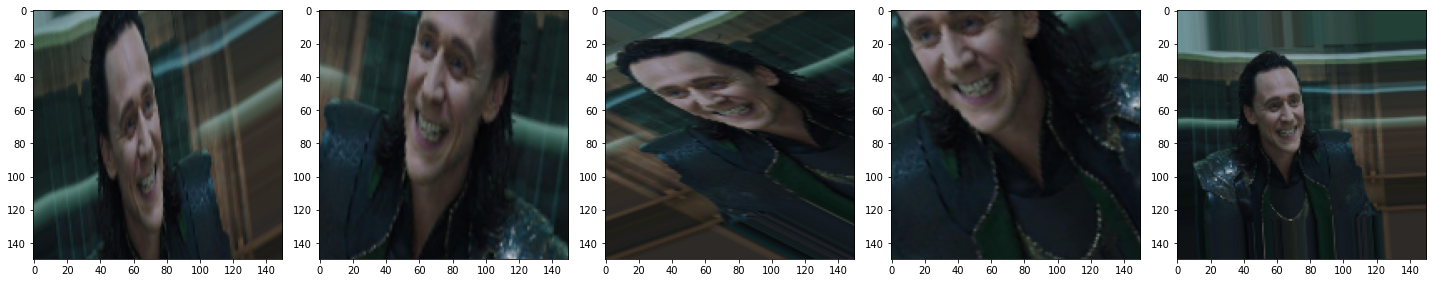

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

# Create a Data Generator for the Validation Set

Generally, we only apply data augmentation to our training examples. So, in the cell below, use ImageDataGenerator to create a transformation that only rescales the images by 255. Then use the `.flow_from_directory` method to apply the above transformation to the images in our validation set.  

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 242 images belonging to 20 classes.


# Create the CNN

In the cell below, we created a convolutional neural network that consists of 3 convolution blocks. Each convolutional block contains a `Conv2D` layer followed by a max pool layer.All convolutional filters are 3 x 3. All max pool layers in this models have a `pool_size` of `(2, 2)`.

After the 3 convolutional blocks we have a flatten layer followed by a fully connected layer with 512 units. The CNN should output class probabilities based on 5 classes which is done by the **softmax** activation function. All other layers should use a **relu** activation function. We also added  Dropout layers with a probability of 20%, where appropriate. 

In [ ]:
model = model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile the Model

In the cell below, compile your model using the ADAM optimizer, the sparse cross entropy function as a loss function. We would also like to look at training and validation accuracy on each epoch as we train our network, so make sure you also pass the metrics argument.

In [ ]:
# Compile the model4
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, Input, Reshape, Dropout, MaxPooling2D, Bidirectional, LSTM
from tensorflow.keras.models import Model
from tensorflow import keras

In [ ]:

model_checkpoint = keras.callbacks.ModelCheckpoint(
    "marvelHentaiCNN.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=15)

In [ ]:
num_tr = len(os.listdir(train_dir))

num_val = len(os.listdir(val_dir))

total_train = num_tr
total_val = num_val

# Train the Model

In the cell below, train your model using the **fit_generator** function instead of the usual **fit** function. We have to use the `fit_generator` function because we are using the **ImageDataGenerator** class to generate batches of training and validation data for our model.

In [ ]:
epochs = 100

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(BATCH_SIZE))),
    callbacks=[early_stopping, model_checkpoint]
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


10/10 [==============================] - 30s 3s/step - loss: 2.9205 - accuracy: 0.0894 - val_loss: 2.7822 - val_accuracy: 0.1405
Epoch 2/100
10/10 [==============================] - 27s 3s/step - loss: 2.7264 - accuracy: 0.1809 - val_loss: 2.6606 - val_accuracy: 0.2273
Epoch 3/100
10/10 [==============================] - 27s 3s/step - loss: 2.5798 - accuracy: 0.2297 - val_loss: 2.4983 - val_accuracy: 0.2686
Epoch 4/100
10/10 [==============================] - 27s 3s/step - loss: 2.4127 - accuracy: 0.2921 - val_loss: 2.3435 - val_accuracy: 0.3306
Epoch 5/100
10/10 [==============================] - 27s 3s/step - loss: 2.3084 - accuracy: 0.2890 - val_loss: 2.3180 - val_accuracy: 0.3347
Epoch 6/100
10/10 [==============================] - 27s 3s/step - loss: 2.1923 - accuracy: 0.3233 - val_loss: 2.2017 - val_accuracy: 0.3347
Epoch 7/100
10/10 [==============================] - 27s 3s/step - loss: 2.0653 - accuracy: 0.3649 - val_loss: 2.0182 - val_accuracy: 0.3760
Epoch 8/100
10/10 [======

# Plot Training and Validation Graphs.

In the cell below, plot the training and validation accuracy/loss graphs. 

Since we used the early stopping callback we need to assign the last epoch executed in the epochs variable in this case the training stopped at 51 epochs so we need to put that value

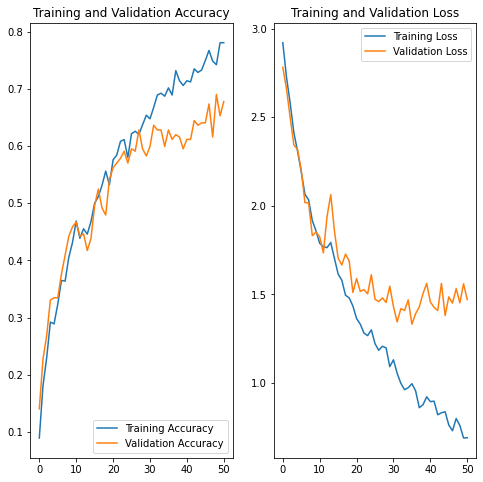

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = 51
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
model = keras.models.load_model("marvelCNN.h5")

# Make predictions

Use the `model.predict` fucntion in order to make predictions using the model we trained previously 

In [ ]:
predictions = model.predict(val_data_gen)

In [ ]:
image_batch, label_batch = next(iter(train_data_gen))
predicted_class_names = []

predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()

predicted_ids = np.argmax(predicted_batch, axis=-1)
for i in range(len(predicted_ids)):
  predicted_class_names.append(classes[predicted_ids[i]])

print(predicted_class_names)

['Hulk', 'BlackWidow', 'WinterSoldier', 'Vision', 'Ironman', 'Spiderman', 'ScarlettWitch', 'CaptainMarvel', 'Spiderman', 'AntMan', 'BlackWidow', 'BlackWidow', 'HawkEye', 'Drax', 'BlackPanther', 'Quake', 'Hulk', 'Hulk', 'AntMan', 'Hulk', 'Ironman', 'Thor', 'Ironman', 'Gamora', 'WinterSoldier', 'CaptainAmerica', 'Drax', 'Ironman', 'Hulk', 'Hulk', 'Spiderman', 'Thor', 'Quake', 'DrStrange', 'Loki', 'BlackWidow', 'Thor', 'ScarlettWitch', 'WinterSoldier', 'Spiderman', 'Spiderman', 'Spiderman', 'AntMan', 'Gamora', 'CaptainAmerica', 'Hulk', 'Quake', 'BlackWidow', 'CaptainAmerica', 'Hulk', 'BlackPanther', 'BlackWidow', 'Drax', 'Spiderman', 'Thor', 'Ironman', 'BlackWidow', 'CaptainAmerica', 'Hulk', 'BlackWidow', 'BlackWidow', 'BlackWidow', 'CaptainMarvel', 'ScarlettWitch', 'Thor', 'Spiderman', 'HawkEye', 'Hulk', 'WinterSoldier', 'CaptainAmerica', 'Hulk', 'BlackWidow', 'Hulk', 'CaptainAmerica', 'ScarlettWitch', 'BlackWidow', 'Ironman', 'Spiderman', 'CaptainAmerica', 'HawkEye', 'Thor', 'Gamora', '

In [ ]:
predicted_ids

array([ 9,  2, 18, 17, 10, 14, 13,  4, 14,  0,  2,  2,  8,  5,  1, 12,  9,
        9,  0,  9, 10, 15, 10,  7, 18,  3,  5, 10,  9,  9, 14, 15, 12,  6,
       11,  2, 15, 13, 18, 14, 14, 14,  0,  7,  3,  9, 12,  2,  3,  9,  1,
        2,  5, 14, 15, 10,  2,  3,  9,  2,  2,  2,  4, 13, 15, 14,  8,  9,
       18,  3,  9,  2,  9,  3, 13,  2, 10, 14,  3,  8, 15,  7, 13, 15, 15,
       15, 10, 10, 10,  5, 10,  9, 14,  2, 13,  9, 15,  6,  2, 13])

In [ ]:
print("Labels:           ", label_batch)
print("Predicted labels: ", predicted_ids)

Labels:            [ 9.  2. 18. 13. 10. 14. 15.  4. 14. 15.  2.  2. 15.  5.  1. 12.  9.  9.
  0.  9. 10.  5. 10.  7.  0. 14.  5. 10.  0.  9. 15. 15. 12. 14. 11.  2.
 15. 13. 11. 14. 14. 14.  7.  7.  3.  9. 12.  3.  3.  9.  1.  2.  5. 14.
  4.  3.  3.  3. 11.  2. 15.  2.  4. 14. 15. 14.  8.  9. 18. 17.  9.  4.
  5. 17. 10.  2. 10.  5.  9.  1. 15.  7. 10.  2. 15. 15. 10. 10. 10. 14.
 10.  9. 14.  2. 13.  9.  2.  6.  2. 13.]
Predicted labels:  [ 9  2 18 17 10 14 13  4 14  0  2  2  8  5  1 12  9  9  0  9 10 15 10  7
 18  3  5 10  9  9 14 15 12  6 11  2 15 13 18 14 14 14  0  7  3  9 12  2
  3  9  1  2  5 14 15 10  2  3  9  2  2  2  4 13 15 14  8  9 18  3  9  2
  9  3 13  2 10 14  3  8 15  7 13 15 15 15 10 10 10  5 10  9 14  2 13  9
 15  6  2 13]


# Plotting results

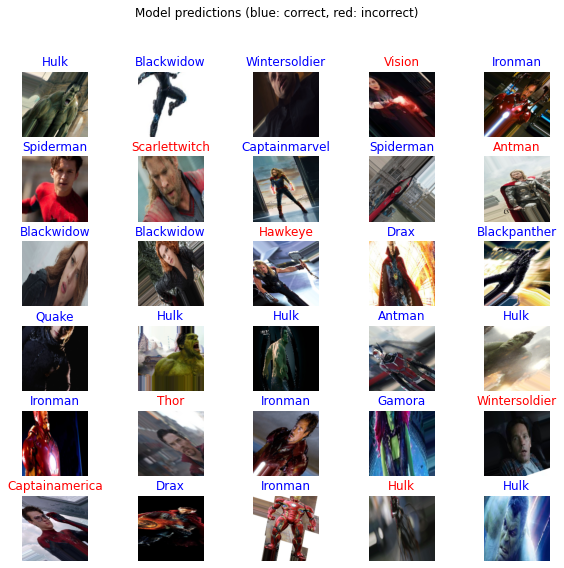

In [ ]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_ids[n] == label_batch[n] else "red"
  plt.title(predicted_class_names[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

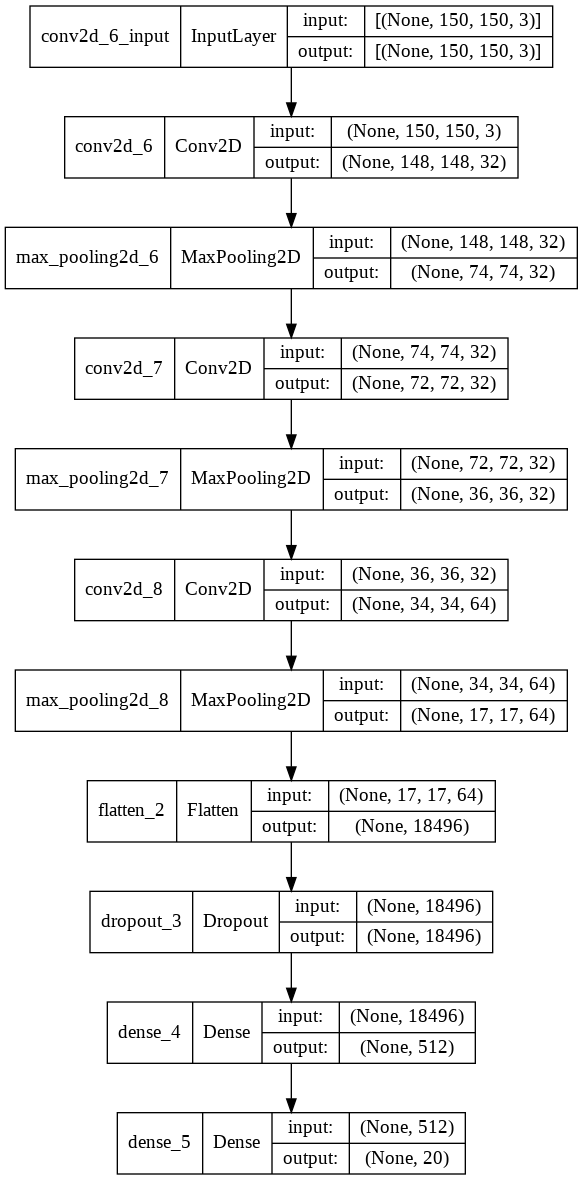

In [ ]:
tf.keras.utils.plot_model(model,to_file="Marvel.png", show_shapes=True)